## <b>Machine Learning</b> <br><i>Iris DataSet</i><br>
Gaussian Naive Bayes<br><br>
Loading the dataset iris flowers image:

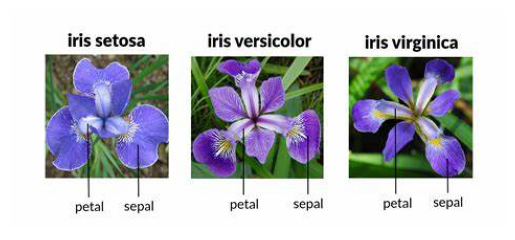

In [ ]:
import numpy as np
import PIL.Image
import urllib.request
import matplotlib.pyplot as plt
image_data = np.array(PIL.Image.open(urllib.request.urlopen("https://raw.githubusercontent.com/redsonlopez/machine_learning/main/iris_image.jpg")))
plt.axis("off")
plt.imshow(image_data);

Pandas library import and data preview:



In [1]:
import pandas as pd
attributes = ["SepalLength", "SepalWidth", "PetalLength", "PetalWidth", "Species"]
df= pd.read_csv("https://raw.githubusercontent.com/redsonlopez/datasets/main/iris.xls", names = attributes, header= 0)
df = df.reset_index(drop= True)
df.columns = attributes

print(f"The dataset has {df.shape[0]} samples with {df.shape[1]} attributes on each of them: \n")
print(df)

The dataset has 150 samples with 5 attributes on each of them: 

     SepalLength  SepalWidth  PetalLength  PetalWidth         Species
0            5.1         3.5          1.4         0.2     Iris-setosa
1            4.9         3.0          1.4         0.2     Iris-setosa
2            4.7         3.2          1.3         0.2     Iris-setosa
3            4.6         3.1          1.5         0.2     Iris-setosa
4            5.0         3.6          1.4         0.2     Iris-setosa
..           ...         ...          ...         ...             ...
145          6.7         3.0          5.2         2.3  Iris-virginica
146          6.3         2.5          5.0         1.9  Iris-virginica
147          6.5         3.0          5.2         2.0  Iris-virginica
148          6.2         3.4          5.4         2.3  Iris-virginica
149          5.9         3.0          5.1         1.8  Iris-virginica

[150 rows x 5 columns]


Separation of test and training data:

In [ ]:
train = pd.concat([df.iloc[15: 85], df.iloc[115: ]])
print(f"For training, {train.shape[0]} samples of the dataset containing the following species were collected:")
print(train["Species"].unique(), "\n")
test= df.iloc[85:115]
print(f"For the tests, another {test.shape[0]} samples were collected from the dataset containing the following species:")
print(test["Species"].unique())

X_train= train.iloc[:, :4].values
X_test= test.iloc[:, :4].values

y_train= train['Species'].values
y_test= test['Species'].values

For training, 105 samples of the dataset containing the following species were collected:
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica'] 

For the tests, another 30 samples were collected from the dataset containing the following species:
['Iris-versicolor' 'Iris-virginica']


Naive Bayes model import and function call for prediction test result:

In [ ]:
from sklearn.naive_bayes import GaussianNB
nvclassifier= GaussianNB()
nvclassifier.fit(X_train, y_train)

y_pred= nvclassifier.predict(X_test)

Comparing actual and predicted value:

In [ ]:
y_compare= np.vstack((y_test, y_pred)).T
print(y_compare[:5, :])

[['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']]


Calculating confusion matrix and model performance:

In [ ]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)
a= cm.shape
corrPred= 0
falsePred= 0
for row in range(a[0]):
  for c in range(a[1]):
    if row== c:
      corrPred+= cm[row, c]
    else:
      falsePred+= cm[row, c]

print("Correct Predictions:", corrPred)
print("False Predictions:", falsePred)
print("\nNaive Bayes Model accuracy:", round(corrPred/(cm.sum())* 100, 2), "%")

Correct Predictions: 29
False Predictions: 1

Naive Bayes Model accuracy: 96.67 %
